# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [4]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [6]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")
newdf

DONE


,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81158,22545821,05,Goldsilk Complex,Công ty CP Bất động sản Hanovid,78.0,2.0,2.0,Tây-Bắc,Đông-Nam,ha dong,van phuc,2000.0
81159,25601798,05,A10-A14 Nam Trung Yên,Tổng Công ty Đầu Tư và Phát Triển Nhà Hà Nội -...,94.0,3.0,2.0,Tây-Nam,Tây-Bắc,cau giay,yen hoa,3214.8
81160,25603729,05,NaN,NaN,55.0,2.0,1.0,NaN,NaN,nam tu liem,my dinh 2,1550.0
81161,25608756,05,Lotus Lake View,Công ty CP đầu tư xây dựng và phát triển nhà số 5,90.0,2.0,2.0,Đông-Nam,Tây-Bắc,long bien,gia thuy,2650.0


In [7]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [15]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
print(newdf.head())


         id month                     project  \
0  28086120    12  Vinhomes Smart City Đại Mỗ   
1  28088954    12               Goldmark City   
2  28097966    12        Chung cư IEC Tứ Hiệp   
3  27895887    12         Vinhomes D'Capitale   
4  28056031    12           The Zen Residence   

                                            investor  square  bedrooms  \
0                                  Tập đoàn Vingroup    60.0       3.0   
1  Công ty TNHH Thương mại - Quảng cáo - Xây dựng...   121.0       3.0   
2                                                NaN    70.0       2.0   
3                               Tân Hoàng Minh Group    39.0       1.0   
4                  Công ty TNHH Gamuda Land Việt Nam    97.0       3.0   

   bathrooms direction   balcony     district        ward   price  
0        1.0  Đông-Nam   Tây-Bắc  nam tu liem      dai mo  1560.0  
1        2.0       NaN       NaN  bac tu liem    phu dien  3300.0  
2        2.0   Tây-Bắc  Đông-Nam    thanh tri     tu hie

In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


In [17]:
newdf.describe()

,square,bedrooms,bathrooms,price
count,81162.000000,81162.000000,81162.000000,81162.000000
mean,83.481974,2.365602,1.897785,2404.748090
std,25.662160,0.622283,0.404293,1038.825418
min,7.000000,1.000000,1.000000,350.000000
25%,66.000000,2.000000,2.000000,1520.000000
50%,79.000000,2.000000,2.000000,2300.000000
75%,98.000000,3.000000,2.000000,3150.000000
max,296.000000,4.000000,4.000000,5000.000000


Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

<Axes: ylabel='price'>

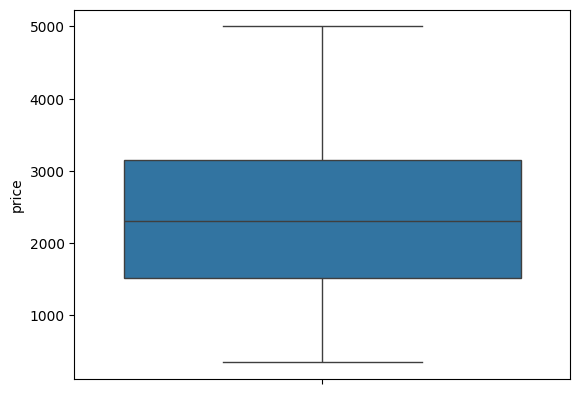

In [25]:
#Code for 'price' field
sns.boxplot(newdf['price'])

<Axes: ylabel='square'>

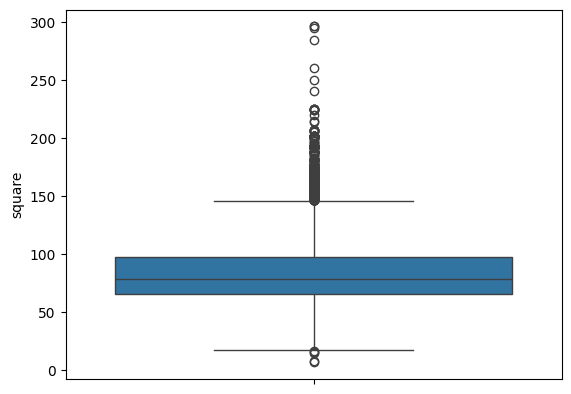

In [26]:
#Code for 'square' field
sns.boxplot(newdf['square'])

<Axes: ylabel='bedrooms'>

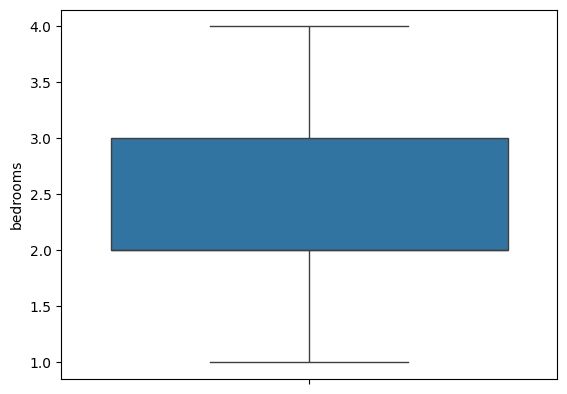

In [27]:
#Code for 'bedrooms' field
sns.boxplot(newdf['bedrooms'])

<Axes: ylabel='bathrooms'>

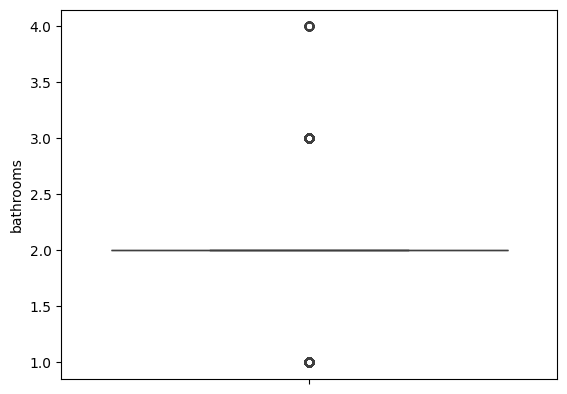

In [28]:
#Code for 'bathrooms' field
sns.boxplot(newdf['bathrooms'])

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

In [32]:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


  month  number of records
0    03                 14
1    04                 35
2    05                150
3    06              11173
4    07              12821
5    08              12440
6    09              12170
7    10              13793
8    11               9473
9    12               9093


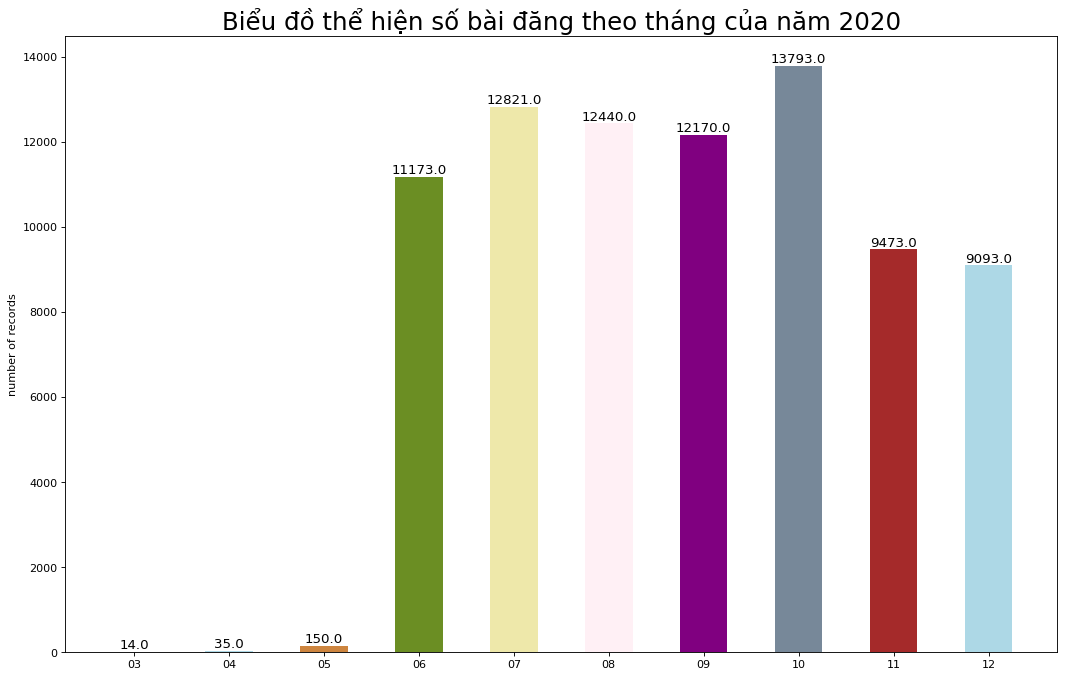

In [48]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
print(df1)
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

/var/folders/f5/s8lvyxdn3m9db7jgrddhv5tm0000gp/T/ipykernel_33645/2651139339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['month'],rotation=60,horizontalalignment='right')


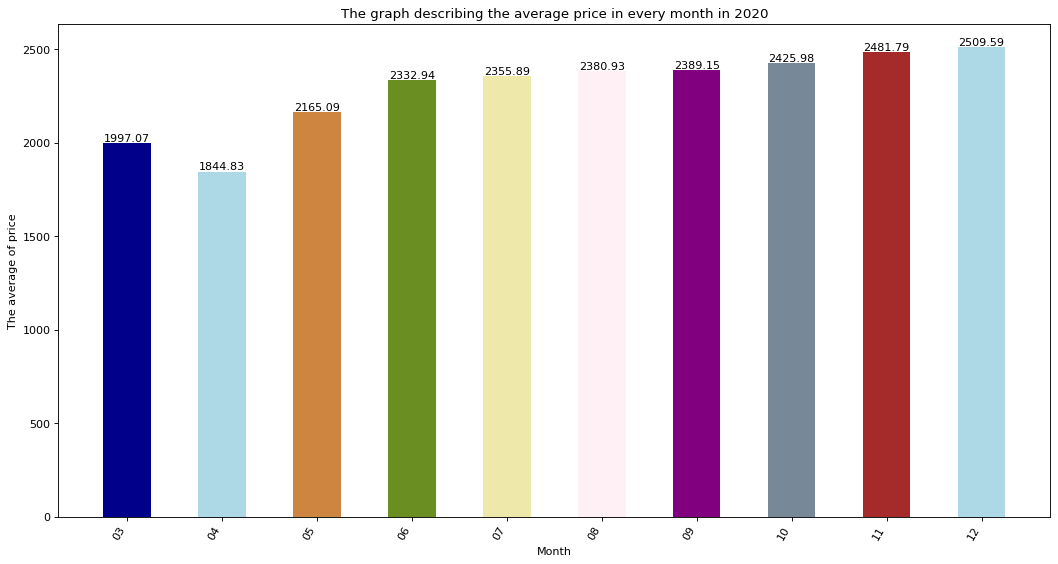

In [71]:
df2 = newdf.groupby('month')[newdf.columns[11]].mean().round(2).reset_index(name='The average of price')
plt.figure(figsize=(16,8),dpi=80)
plt.bar(df2['month'],df2['The average of price'],color=c,width=0.5)
for i,val in enumerate(df2['The average of price'].values):
    plt.text(i,val,val,horizontalalignment='center',verticalalignment='bottom')
plt.gca().set_xticklabels(df2['month'],rotation=60,horizontalalignment='right')
plt.xlabel('Month')
plt.ylabel('The average of price')
plt.title('The graph describing the average price in every month in 2020')
plt.show()

* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

In [83]:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [244]:
newdf['average']=newdf['price']/newdf['square']
newdf

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price,average
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0,26.000000
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0,27.272727
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0,15.800000
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0,38.461538
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0,29.896907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81158,22545821,05,Goldsilk Complex,Công ty CP Bất động sản Hanovid,78.0,2.0,2.0,Tây-Bắc,Đông-Nam,ha dong,van phuc,2000.0,25.641026
81159,25601798,05,A10-A14 Nam Trung Yên,Tổng Công ty Đầu Tư và Phát Triển Nhà Hà Nội -...,94.0,3.0,2.0,Tây-Nam,Tây-Bắc,cau giay,yen hoa,3214.8,34.200000
81160,25603729,05,NaN,NaN,55.0,2.0,1.0,NaN,NaN,nam tu liem,my dinh 2,1550.0,28.181818
81161,25608756,05,Lotus Lake View,Công ty CP đầu tư xây dựng và phát triển nhà số 5,90.0,2.0,2.0,Đông-Nam,Tây-Bắc,long bien,gia thuy,2650.0,29.444444


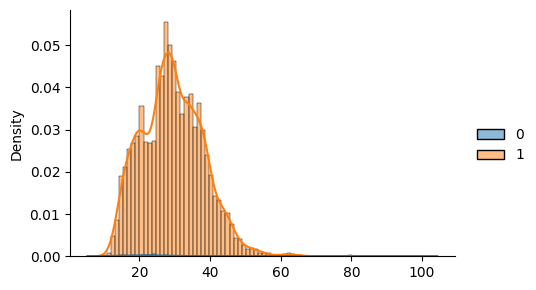

In [283]:
#Gọi ý: sns.displot()
df4=newdf.loc[newdf['month']=='04']['average']
df12=newdf.loc[newdf['month']=='12']['average']

sns.displot([df4,
             df12],
             stat='density',
             kde_kws=dict(cut=3),
             kde=True,
             height=3,
             aspect=1.6
             )


* Số lượng bất động sản phân theo số lượng bedrooms

In [108]:
#Code ở đây
newdf.groupby('bedrooms').size().reset_index(name='The number of bedrooms')

,bedrooms,The number of bedrooms
0,1.0,4158
1,2.0,45317
2,3.0,29543
3,4.0,2144


* Giá bất động sản trung bình theo số lượng bedrooms

In [113]:
# Code ở đây
newdf.groupby('bedrooms')[newdf.columns[11]].mean().round(2).reset_index(name='The average price')

,bedrooms,The average price
0,1.0,1342.61
1,2.0,2019.56
2,3.0,3037.27
3,4.0,3890.33


* Giá nhà đất trung bình theo quận (VND/m2)

In [114]:
# Code ở đây
newdf.groupby('district')[newdf.columns[11]].mean().round(2).reset_index(name='The average price')

,district,The average price
0,ba dinh,3335.35
1,bac tu liem,3041.18
2,cau giay,3033.77
3,chuong my,687.32
4,dan phuong,1117.53
5,dong anh,1415.67
6,dong da,2693.79
7,gia lam,1698.44
8,ha dong,1635.69
9,hai ba trung,3227.85


* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

In [119]:
# Code ở đây
dfhk=newdf.loc[newdf['district']=='hoan kiem']
dfhk.groupby('ward')[newdf.columns[11]].mean().round(2).reset_index(name='The average price of ward in Hoan Kiem')

,ward,The average price of ward in Hoan Kiem
0,chuong duong,1233.33
1,cua dong,2150.00
2,cua nam,3145.00
3,dong xuan,2200.00
4,hang bai,3725.00
5,hang bo,2300.00
6,hang buom,2050.00
7,hang ma,2100.00
8,ly thai to,1450.00
9,phan chu trinh,2475.00


* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [121]:
# Code ở đây
newdf.groupby('investor')[newdf.columns[11]].mean().round(2).reset_index(name='The average price')

,investor,The average price
0,Bộ Tham Mưu - Bộ Tư Lệnh Bộ Đội Biên Phòng,1787.00
1,C.T Group,2157.31
2,Công TNHH Bắc Chương Dương,2831.39
3,Công Ty CP Đầu Tư Xây Dựng Và Địa Ốc An Việt ...,2366.67
4,Công ty Booyoung,2491.67
...,...,...
257,Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần,3670.88
258,Tổng công ty Đầu tư Phát triển Hạ tầng đô thị ...,2945.31
259,Tổng công ty đầu tư phát triển nhà và đô thị B...,2655.01
260,Vimefulland,1815.00


* Giá nhà đất trung bình theo dự án (VND/m2)

In [124]:
# Code ở đây
newdf.groupby('project')[newdf.columns[11]].mean().round(2).reset_index(name='The average price').sort_values('The average price',ascending=False)

,project,The average price
70,Chung cư 379 Đội Cấn,5000.00
229,Hateco Laroma,4972.00
157,D’. Le Roi Soleil - Quảng An,4884.00
439,Platinum Residences,4850.44
596,Vinhomes Metropolis - Liễu Giai,4768.22
...,...,...
289,Khu đô thị Duyên Thái,710.00
365,Lộc Ninh Singashine,687.32
538,Tiểu khu đô thị mới Vạn Phúc,630.00
347,KĐT Mê Linh - Thanh Lâm - Đại Thịnh,603.80


* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

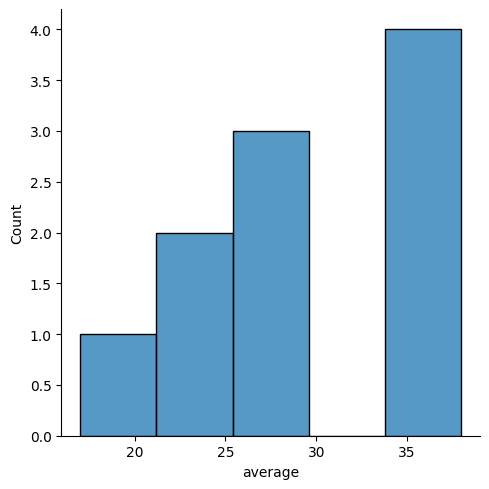

In [165]:
dfdis=newdf.groupby('investor')[[newdf.columns[4],newdf.columns[11]]].sum().sort_values('price',ascending=False).head(10)
dfdis['average']=dfdis['price']/dfdis['square']
sns.displot(dfdis['average'])

* Giá bất động sản phân bố theo dự án

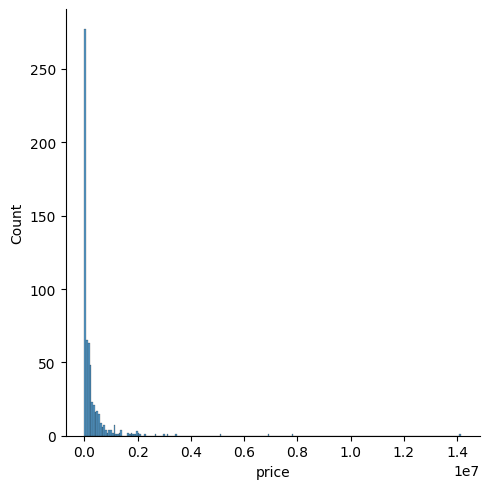

In [168]:
# Code ở đây
dfpro=newdf.groupby('project')[newdf.columns[11]].sum().reset_index(name='price')
sns.displot(dfpro['price'])

In [169]:
newdf

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81158,22545821,05,Goldsilk Complex,Công ty CP Bất động sản Hanovid,78.0,2.0,2.0,Tây-Bắc,Đông-Nam,ha dong,van phuc,2000.0
81159,25601798,05,A10-A14 Nam Trung Yên,Tổng Công ty Đầu Tư và Phát Triển Nhà Hà Nội -...,94.0,3.0,2.0,Tây-Nam,Tây-Bắc,cau giay,yen hoa,3214.8
81160,25603729,05,NaN,NaN,55.0,2.0,1.0,NaN,NaN,nam tu liem,my dinh 2,1550.0
81161,25608756,05,Lotus Lake View,Công ty CP đầu tư xây dựng và phát triển nhà số 5,90.0,2.0,2.0,Đông-Nam,Tây-Bắc,long bien,gia thuy,2650.0


* Giá nhà đất trung bình theo hướng nhà (VND/m2)

In [180]:
# Code ở đây
dfdir=newdf.groupby('direction')[[newdf.columns[4],newdf.columns[11]]].sum()
dfdir['average']=dfdir['price']/dfdir['square']
dfdir['average'].reset_index(name='average')

,direction,average
0,Bắc,32.172936
1,Nam,33.329234
2,Tây,32.008379
3,Tây-Bắc,27.541786
4,Tây-Nam,27.390199
5,Đông,31.431912
6,Đông-Bắc,26.708747
7,Đông-Nam,27.083118


3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

<Axes: >

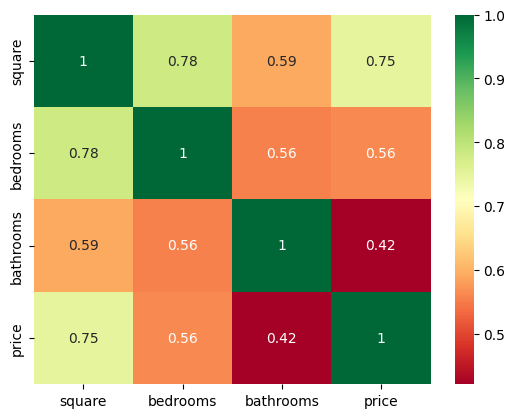

In [189]:
numeric_columns = ['square','bedrooms','bathrooms','price']

correlation_matrix = newdf[numeric_columns].corr()
correlation_matrix
sns.heatmap(correlation_matrix,annot=True, cmap='RdYlGn')

* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

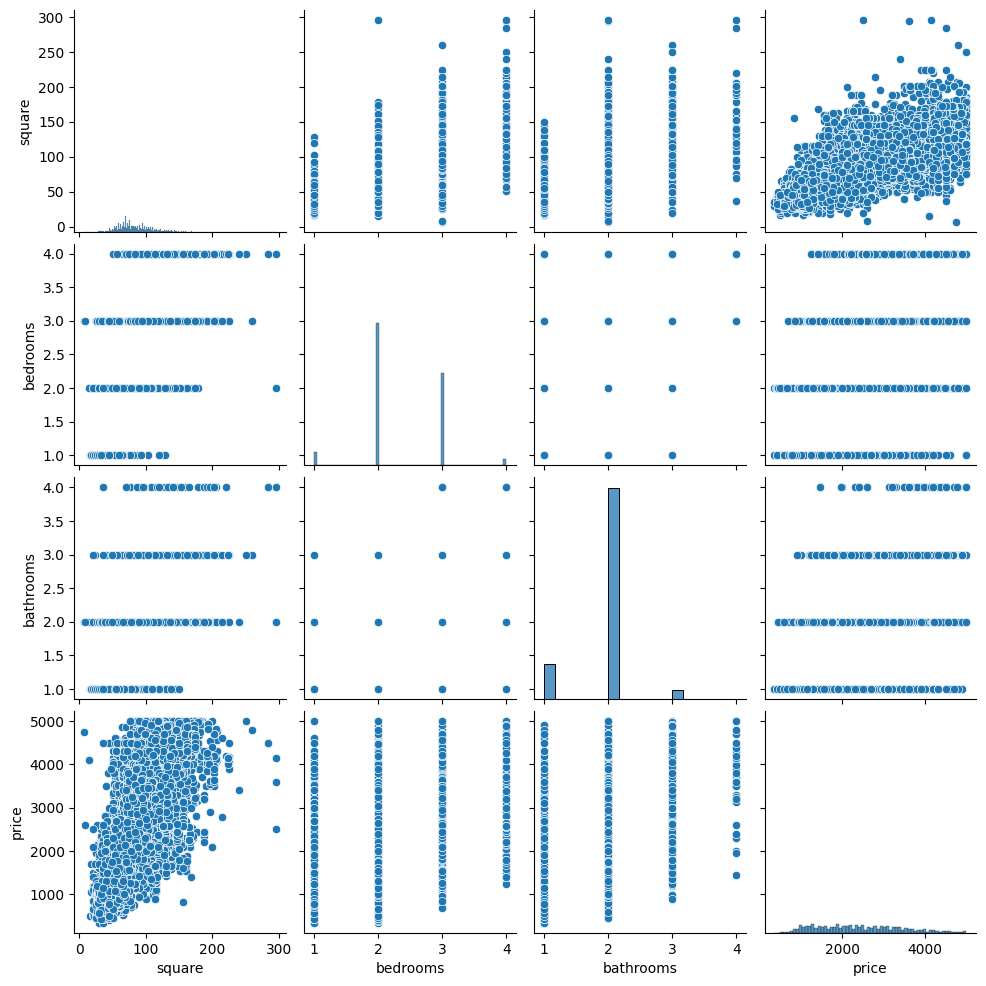

In [287]:
#Gợi ý: sns.pairplot(kind='scatter', ...)

sns.pairplot(newdf[numeric_columns],kind='scatter')

4. Mật độ giá nhà trung bình theo quận 

In [288]:
#Gợi ý: sns.displot()
newdf

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price,average
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0,26.000000
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0,27.272727
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0,15.800000
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0,38.461538
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0,29.896907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81158,22545821,05,Goldsilk Complex,Công ty CP Bất động sản Hanovid,78.0,2.0,2.0,Tây-Bắc,Đông-Nam,ha dong,van phuc,2000.0,25.641026
81159,25601798,05,A10-A14 Nam Trung Yên,Tổng Công ty Đầu Tư và Phát Triển Nhà Hà Nội -...,94.0,3.0,2.0,Tây-Nam,Tây-Bắc,cau giay,yen hoa,3214.8,34.200000
81160,25603729,05,NaN,NaN,55.0,2.0,1.0,NaN,NaN,nam tu liem,my dinh 2,1550.0,28.181818
81161,25608756,05,Lotus Lake View,Công ty CP đầu tư xây dựng và phát triển nhà số 5,90.0,2.0,2.0,Đông-Nam,Tây-Bắc,long bien,gia thuy,2650.0,29.444444


In [294]:
dff=newdf.groupby('district')[['square','price']].sum()
dff['dis']=dff['price']/dff['square']
dff['dis'].reset_index(name='The average price')

,district,The average price
0,ba dinh,40.702162
1,bac tu liem,29.567117
2,cau giay,32.826558
3,chuong my,12.610037
4,dan phuong,14.800012
5,dong anh,21.143381
6,dong da,33.624122
7,gia lam,28.525223
8,ha dong,20.453306
9,hai ba trung,36.907720


End :))